In [49]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pickle
import numpy as np
import matplotlib.pylab as plt
import lsst.afw.image as afwImg
from descwl_shear_sims.psfs import make_dm_psf
import lsst.afw.geom as afwGeom
import lsst.geom as geom

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
exposure    =   afwImg.ExposureF.readFits(fname)
with open('outputs/PSF_test0.pkl', 'rb') as f:
     psf_dict= pickle.load(f)
psf_dm=make_dm_psf(**psf_dict)
        
exposure.setPsf(psf_dm)

if not exposure.hasPsf():
    print("exposure doesnot have PSF")
mi      =   exposure.getMaskedImage()
im      =   mi.getImage()
galData =   im.getArray()
# mskDat  =   mi.getMask().getArray()
# varDat  =   mi.getVariance().getArray()
wcs     =   exposure.getInfo().getWcs()
scale   =   wcs.getPixelScale().asArcseconds()
image_ny,image_nx= galData.shape

nbegin  =   (_DefaultImgSize-image_nx)//2
nend    =   nbegin+image_nx

In [36]:
im=exposure.getMaskedImage()

In [34]:
psfExp=exposure.getPsf()
bbox=exposure.getBBox()
bcent=bbox.getCenter()
psf1=psfExp.computeImage(geom.Point2I(bcent)).getArray()

In [58]:
info=exposure.getInfo()

In [68]:
print(exposure.getPhotoCalib())

None


In [66]:
a=info.getMetadata()

In [65]:
print(a)

EXPINFO_V = 2
EXTNAME = "IMAGE"



In [48]:
type(bcent)

lsst.geom.Point2D

Point2I(205, 205)

In [ ]:
afwGeom.Point2

In [51]:
psf0=psfExp.computeImage(bcent).getArray()
psf1=psfExp.computeImage(geom.Point2I(bcent)).getArray()

In [53]:
psf1

array([[3.78191231e-07, 4.17041690e-07, 4.59861496e-07, ...,
        4.59861496e-07, 4.17041690e-07, 3.78191231e-07],
       [4.17041690e-07, 4.61822736e-07, 5.11446956e-07, ...,
        5.11446956e-07, 4.61822736e-07, 4.17041690e-07],
       [4.59861496e-07, 5.11446956e-07, 5.68947485e-07, ...,
        5.68947485e-07, 5.11446956e-07, 4.59861496e-07],
       ...,
       [4.59861496e-07, 5.11446956e-07, 5.68947485e-07, ...,
        5.68947485e-07, 5.11446956e-07, 4.59861496e-07],
       [4.17041690e-07, 4.61822736e-07, 5.11446956e-07, ...,
        5.11446956e-07, 4.61822736e-07, 4.17041690e-07],
       [3.78191231e-07, 4.17041690e-07, 4.59861496e-07, ...,
        4.59861496e-07, 4.17041690e-07, 3.78191231e-07]])

In [41]:
psf0.shape

(51, 51)

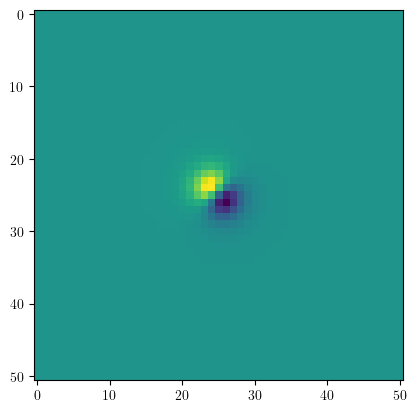

In [54]:
plt.imshow(psf0-psf1)

In [42]:
psf0.max()

0.03364717960357666